In [2]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
sns.set(style="white")

In [5]:
average_scores_and_possible_2009_gold = {
        "eqc7_2": 0.68,
        "mrc5": 1.48,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.04,
        "ssc7_1": 0.48,
        "eqc6_1": 0.73,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.26,
        "ssc2_possible": 5.0,
        "ssc4_1": 4.17,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.7,
        "extra4": 0.65,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.54,
        "eac1_possible": 19.0,
        "mrc1_1": 0.54,
        "mrc4": 1.56,
        "eqc3_1": 0.95,
        "ssc4_4": 1.52,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.04,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.22,
        "ssc3_possible": 1.0,
        "eac2": 1.81,
        "ssc2": 3.43,
        "extra2_possible": 1.0,
        "ssc7_2": 0.83,
        "extra1": 0.58,
        "extra2": 0.61,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.18,
        "eqc7_1": 0.86,
        "eac4": 1.09,
        "eac5": 1.08,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000013300.79,
        "eac4_possible": 2.0,
        "ssc4_3": 2.4,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.26,
        "wec1": 2.91,
        "eac6_possible": 2.0,
        "eqc2": 0.39,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.43,
        "eqc5": 0.48,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 1.0,
        "ssc4_2": 0.7,
        "mrc6": 0.03,
        "eac3_possible": 2.0,
        "ssc5_2": 0.69,
        "eac3": 1.26,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000013300.79,
        "ssc8": 0.27,
        "id": 1196.01,
        "ssc6_1": 0.5,
        "ssc1": 0.88,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.41,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.9,
        "mrc2": 1.78,
        "idc2": 1.0,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 3.43,
        "ssc6_2": 0.53,
        "mrc7": 0.42,
        "eqc4_2": 0.97,
        "eac1": 11.75,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.94,
        "eqc6_1_possible": 1.0,
        "wec3": 2.91,
        "eqc3_2": 0.43,
        "eqc4_4": 0.76
    }

In [6]:
gold_2009 = pd.Series(average_scores_and_possible_2009_gold)

In [7]:
list_of_2009_scores_and_possible = list(gold_2009.index.values)

In [8]:
possible_2009 = [item for item in list_of_2009_scores_and_possible if "possible" in item]

In [9]:
average_2009 = [item for item in list_of_2009_scores_and_possible if "possible" not in item]

In [10]:
average_2009.remove('id')

In [11]:
average_2009.remove('project_id')

In [12]:
average_2009.remove('project')

In [13]:
len(average_2009)

52

In [14]:
len(possible_2009)

52

In [15]:
gold_2009_average = gold_2009[average_2009]

In [16]:
gold_2009_average.head()

eac1    11.75
eac2     1.81
eac3     1.26
eac4     1.09
eac5     1.08
dtype: float64

In [17]:
gold_2009_possible = gold_2009[possible_2009]

In [18]:
gold_2009_possible = gold_2009_possible.reset_index()
gold_2009_average = gold_2009_average.reset_index()

In [19]:
gold_score_and_possible_2009 = pd.concat([gold_2009_average, gold_2009_possible], axis=1)

In [20]:
gold_score_and_possible_2009.columns = ['Gold Score ID', 'Gold Average', 'Score Possible Name', 'Gold Score Possible']

In [21]:
gold_score_and_possible_2009.head()

,Gold Score ID,Gold Average,Score Possible Name,Gold Score Possible
0,eac1,11.75,eac1_possible,19
1,eac2,1.81,eac2_possible,7
2,eac3,1.26,eac3_possible,2
3,eac4,1.09,eac4_possible,2
4,eac5,1.08,eac5_possible,3


In [22]:
average_scores_and_possible_2009_platinum = {
        "eqc7_2": 0.85,
        "mrc5": 1.4,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.03,
        "ssc7_1": 0.65,
        "eqc6_1": 0.79,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.74,
        "ssc2_possible": 5.0,
        "ssc4_1": 5.04,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.72,
        "extra4": 0.62,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.67,
        "eac1_possible": 19.0,
        "mrc1_1": 0.61,
        "mrc4": 1.62,
        "eqc3_1": 0.99,
        "ssc4_4": 1.68,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.17,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.46,
        "ssc3_possible": 1.0,
        "eac2": 5.33,
        "ssc2": 4.2,
        "extra2_possible": 1.0,
        "ssc7_2": 0.87,
        "extra1": 0.76,
        "extra2": 0.65,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.34,
        "eqc7_1": 0.94,
        "eac4": 1.22,
        "eac5": 1.99,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000011013.9,
        "eac4_possible": 2.0,
        "ssc4_3": 2.81,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.37,
        "wec1": 2.96,
        "eac6_possible": 2.0,
        "eqc2": 0.52,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.62,
        "eqc5": 0.58,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 1.53,
        "ssc4_2": 0.79,
        "mrc6": 0.08,
        "eac3_possible": 2.0,
        "ssc5_2": 0.8,
        "eac3": 1.55,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000011013.9,
        "ssc8": 0.48,
        "id": 1000.38,
        "ssc6_1": 0.58,
        "ssc1": 0.91,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.56,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.91,
        "mrc2": 1.81,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 4.38,
        "ssc6_2": 0.67,
        "mrc7": 0.58,
        "eqc4_2": 0.99,
        "eac1": 17.67,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.97,
        "eqc6_1_possible": 1.0,
        "wec3": 3.42,
        "eqc3_2": 0.54,
        "eqc4_4": 0.88
    }

In [23]:
platinum_2009 = pd.Series(average_scores_and_possible_2009_platinum)
platinum_2009_average = platinum_2009[average_2009]
platinum_2009_possible = platinum_2009[possible_2009]
platinum_2009_possible = platinum_2009_possible.reset_index()
platinum_2009_average = platinum_2009_average.reset_index()
platinum_score_and_possible_2009 = pd.concat([platinum_2009_average, platinum_2009_possible], axis=1)
platinum_score_and_possible_2009.columns = ['Platinum Score ID', 'Platinum Average', 'Platinum Score Possible Name', 'Platinum Score Possible']

In [24]:
platinum_score_and_possible_2009

,Platinum Score ID,Platinum Average,Platinum Score Possible Name,Platinum Score Possible
0,eac1,17.67,eac1_possible,19
1,eac2,5.33,eac2_possible,7
2,eac3,1.55,eac3_possible,2
3,eac4,1.22,eac4_possible,2
4,eac5,1.99,eac5_possible,3
5,eac6,1.53,eac6_possible,2
6,eqc1,0.67,eqc1_possible,1
7,eqc2,0.52,eqc2_possible,1
8,eqc3_1,0.99,eqc3_1_possible,1
9,eqc3_2,0.54,eqc3_2_possible,1


In [25]:
average_scores_and_possible_2009_silver = {
        "eqc7_2": 0.55,
        "mrc5": 1.49,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.02,
        "ssc7_1": 0.46,
        "eqc6_1": 0.71,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.11,
        "ssc2_possible": 5.0,
        "ssc4_1": 3.19,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.65,
        "extra4": 0.55,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.46,
        "eac1_possible": 19.0,
        "mrc1_1": 0.46,
        "mrc4": 1.46,
        "eqc3_1": 0.93,
        "ssc4_4": 1.42,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.04,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.13,
        "ssc3_possible": 1.0,
        "eac2": 0.57,
        "ssc2": 2.82,
        "extra2_possible": 1.0,
        "ssc7_2": 0.77,
        "extra1": 0.45,
        "extra2": 0.64,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.16,
        "eqc7_1": 0.82,
        "eac4": 1.03,
        "eac5": 0.82,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000014332.76,
        "eac4_possible": 2.0,
        "ssc4_3": 2.33,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.18,
        "wec1": 2.83,
        "eac6_possible": 2.0,
        "eqc2": 0.33,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.35,
        "eqc5": 0.38,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.84,
        "ssc4_2": 0.63,
        "mrc6": 0.01,
        "eac3_possible": 2.0,
        "ssc5_2": 0.65,
        "eac3": 1.1,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000014332.76,
        "ssc8": 0.23,
        "id": 1287.11,
        "ssc6_1": 0.43,
        "ssc1": 0.86,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.45,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.91,
        "mrc2": 1.71,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.8,
        "ssc6_2": 0.48,
        "mrc7": 0.34,
        "eqc4_2": 0.97,
        "eac1": 7.6,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.92,
        "eqc6_1_possible": 1.0,
        "wec3": 2.65,
        "eqc3_2": 0.42,
        "eqc4_4": 0.7
    }


In [26]:
silver_2009 = pd.Series(average_scores_and_possible_2009_silver)
silver_2009_average = silver_2009[average_2009]
silver_2009_possible = silver_2009[possible_2009]
silver_2009_possible = silver_2009_possible.reset_index()
silver_2009_average = silver_2009_average.reset_index()
silver_score_and_possible_2009 = pd.concat([silver_2009_average, silver_2009_possible], axis=1)
silver_score_and_possible_2009.columns = ['Silver Score ID', 'Silver Average', 'Silver Score Possible Name', 'Silver Score Possible']

In [27]:
silver_score_and_possible_2009

,Silver Score ID,Silver Average,Silver Score Possible Name,Silver Score Possible
0,eac1,7.60,eac1_possible,19
1,eac2,0.57,eac2_possible,7
2,eac3,1.10,eac3_possible,2
3,eac4,1.03,eac4_possible,2
4,eac5,0.82,eac5_possible,3
5,eac6,0.84,eac6_possible,2
6,eqc1,0.46,eqc1_possible,1
7,eqc2,0.33,eqc2_possible,1
8,eqc3_1,0.93,eqc3_1_possible,1
9,eqc3_2,0.42,eqc3_2_possible,1


In [28]:
average_scores_and_possible_2009_certified = {
        "eqc7_2": 0.53,
        "mrc5": 1.38,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.03,
        "ssc7_1": 0.32,
        "eqc6_1": 0.65,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.05,
        "ssc2_possible": 5.0,
        "ssc4_1": 2.35,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.53,
        "extra4": 0.48,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.27,
        "eac1_possible": 19.0,
        "mrc1_1": 0.36,
        "mrc4": 1.3,
        "eqc3_1": 0.91,
        "ssc4_4": 1.2,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.03,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.14,
        "ssc3_possible": 1.0,
        "eac2": 0.21,
        "ssc2": 2.32,
        "extra2_possible": 1.0,
        "ssc7_2": 0.8,
        "extra1": 0.43,
        "extra2": 0.58,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.12,
        "eqc7_1": 0.75,
        "eac4": 0.76,
        "eac5": 0.56,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000015097.94,
        "eac4_possible": 2.0,
        "ssc4_3": 2.34,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.11,
        "wec1": 2.66,
        "eac6_possible": 2.0,
        "eqc2": 0.29,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.35,
        "eqc5": 0.3,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.72,
        "ssc4_2": 0.55,
        "mrc6": 0.01,
        "eac3_possible": 2.0,
        "ssc5_2": 0.55,
        "eac3": 0.58,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000015097.94,
        "ssc8": 0.2,
        "id": 1338.27,
        "ssc6_1": 0.29,
        "ssc1": 0.83,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.35,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.84,
        "mrc2": 1.51,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.15,
        "ssc6_2": 0.41,
        "mrc7": 0.23,
        "eqc4_2": 0.93,
        "eac1": 5.41,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.87,
        "eqc6_1_possible": 1.0,
        "wec3": 2.2,
        "eqc3_2": 0.32,
        "eqc4_4": 0.59
    }


In [29]:
certified_2009 = pd.Series(average_scores_and_possible_2009_certified)
certified_2009_average = certified_2009[average_2009]
certified_2009_possible = certified_2009[possible_2009]
certified_2009_possible = certified_2009_possible.reset_index()
certified_2009_average = certified_2009_average.reset_index()
certified_score_and_possible_2009 = pd.concat([certified_2009_average, certified_2009_possible], axis=1)
certified_score_and_possible_2009.columns = ['Certified Score ID', 'Certified Average', 'Certified Score Possible Name', 'Certified Score Possible']

In [30]:
certified_score_and_possible_2009

,Certified Score ID,Certified Average,Certified Score Possible Name,Certified Score Possible
0,eac1,5.41,eac1_possible,19
1,eac2,0.21,eac2_possible,7
2,eac3,0.58,eac3_possible,2
3,eac4,0.76,eac4_possible,2
4,eac5,0.56,eac5_possible,3
5,eac6,0.72,eac6_possible,2
6,eqc1,0.27,eqc1_possible,1
7,eqc2,0.29,eqc2_possible,1
8,eqc3_1,0.91,eqc3_1_possible,1
9,eqc3_2,0.32,eqc3_2_possible,1


In [31]:
certified_2009

eac1                5.41
eac1_possible      19.00
eac2                0.21
eac2_possible       7.00
eac3                0.58
eac3_possible       2.00
eac4                0.76
eac4_possible       2.00
eac5                0.56
eac5_possible       3.00
eac6                0.72
eac6_possible       2.00
eqc1                0.27
eqc1_possible       1.00
eqc2                0.29
eqc2_possible       1.00
eqc3_1              0.91
eqc3_1_possible     1.00
eqc3_2              0.32
eqc3_2_possible     1.00
eqc4_1              0.87
eqc4_1_possible     1.00
eqc4_2              0.93
eqc4_2_possible     1.00
eqc4_3              0.84
eqc4_3_possible     1.00
eqc4_4              0.59
eqc4_4_possible     1.00
eqc5                0.30
eqc5_possible       1.00
                   ...  
ssc3                0.11
ssc3_possible       1.00
ssc4_1              2.35
ssc4_1_possible     6.00
ssc4_2              0.55
ssc4_2_possible     1.00
ssc4_3              2.34
ssc4_3_possible     3.00
ssc4_4              1.20


In [32]:
average_comparison_2009 = pd.concat([platinum_score_and_possible_2009, gold_score_and_possible_2009, silver_score_and_possible_2009, certified_score_and_possible_2009], axis=1)

In [33]:
average_comparison_2009_small = average_comparison_2009[['Platinum Score ID', 'Platinum Average', 'Gold Average', 'Silver Average', 'Certified Average', 'Platinum Score Possible']]

In [34]:
average_comparison_2009_small.columns = ['Score ID', 'Platinum', 'Gold', 'Silver', 'Certified', 'Score Possible']

In [35]:
average_comparison_2009_small = average_comparison_2009_small.set_index('Score ID')


In [36]:
average_comparison_2009_small.index = average_comparison_2009_small.index.map(lambda x: x.upper())
average_comparison_2009_small.index = average_comparison_2009_small.index.map(lambda x: x.replace("_", "."))

In [37]:
average_comparison_2009_small['Platinum Mean as Percent of Total Available'] = \
average_comparison_2009_small['Platinum']/average_comparison_2009_small['Score Possible']
average_comparison_2009_small['Gold Mean as Percent of Total Available'] = \
average_comparison_2009_small['Gold']/average_comparison_2009_small['Score Possible']
average_comparison_2009_small['Silver Mean as Percent of Total Available'] = \
average_comparison_2009_small['Silver']/average_comparison_2009_small['Score Possible']
average_comparison_2009_small['Certified Mean as Percent of Total Available'] = \
average_comparison_2009_small['Certified']/average_comparison_2009_small['Score Possible']

In [38]:
average_comparison_2009_small

,Platinum,Gold,Silver,Certified,Score Possible,Platinum Mean as Percent of Total Available,Gold Mean as Percent of Total Available,Silver Mean as Percent of Total Available,Certified Mean as Percent of Total Available
EAC1,17.67,11.75,7.60,5.41,19,0.930000,0.618421,0.400000,0.284737
EAC2,5.33,1.81,0.57,0.21,7,0.761429,0.258571,0.081429,0.030000
EAC3,1.55,1.26,1.10,0.58,2,0.775000,0.630000,0.550000,0.290000
EAC4,1.22,1.09,1.03,0.76,2,0.610000,0.545000,0.515000,0.380000
EAC5,1.99,1.08,0.82,0.56,3,0.663333,0.360000,0.273333,0.186667
EAC6,1.53,1.00,0.84,0.72,2,0.765000,0.500000,0.420000,0.360000
EQC1,0.67,0.54,0.46,0.27,1,0.670000,0.540000,0.460000,0.270000
EQC2,0.52,0.39,0.33,0.29,1,0.520000,0.390000,0.330000,0.290000
EQC3.1,0.99,0.95,0.93,0.91,1,0.990000,0.950000,0.930000,0.910000
EQC3.2,0.54,0.43,0.42,0.32,1,0.540000,0.430000,0.420000,0.320000


In [39]:
average_comparison_2009_small.to_pickle('LEEDv2009byCertificationLevel.pkl')

In [40]:
average_scores_and_possible_2009_2011 = {
        "eqc7_2": 0.66,
        "mrc5": 1.49,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.01,
        "ssc7_1": 0.38,
        "eqc6_1": 0.67,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.23,
        "ssc2_possible": 5.0,
        "ssc4_1": 3.65,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.72,
        "extra4": 0.61,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.38,
        "eac1_possible": 19.0,
        "mrc1_1": 0.48,
        "mrc4": 1.39,
        "eqc3_1": 0.92,
        "ssc4_4": 1.25,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.07,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.23,
        "ssc3_possible": 1.0,
        "eac2": 1.7,
        "ssc2": 3.26,
        "extra2_possible": 1.0,
        "ssc7_2": 0.75,
        "extra1": 0.56,
        "extra2": 0.61,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.16,
        "eqc7_1": 0.86,
        "eac4": 0.8,
        "eac5": 0.92,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000004458.22,
        "eac4_possible": 2.0,
        "ssc4_3": 2.57,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.17,
        "wec1": 2.9,
        "eac6_possible": 2.0,
        "eqc2": 0.37,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.49,
        "eqc5": 0.41,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 1.17,
        "ssc4_2": 0.55,
        "mrc6": 0.08,
        "eac3_possible": 2.0,
        "ssc5_2": 0.57,
        "eac3": 0.87,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000004458.22,
        "ssc8": 0.33,
        "id": 403.08,
        "ssc6_1": 0.43,
        "ssc1": 0.85,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.33,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.88,
        "mrc2": 1.56,
        "idc2": 0.96,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 3.07,
        "ssc6_2": 0.42,
        "mrc7": 0.31,
        "eqc4_2": 0.96,
        "eac1": 9.49,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.93,
        "eqc6_1_possible": 1.0,
        "wec3": 2.75,
        "eqc3_2": 0.36,
        "eqc4_4": 0.64
    }

average_scores_and_possible_2009_certified = {
        "eqc7_2": 0.53,
        "mrc5": 1.38,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.03,
        "ssc7_1": 0.32,
        "eqc6_1": 0.65,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.05,
        "ssc2_possible": 5.0,
        "ssc4_1": 2.35,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.53,
        "extra4": 0.48,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.27,
        "eac1_possible": 19.0,
        "mrc1_1": 0.36,
        "mrc4": 1.3,
        "eqc3_1": 0.91,
        "ssc4_4": 1.2,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.03,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.14,
        "ssc3_possible": 1.0,
        "eac2": 0.21,
        "ssc2": 2.32,
        "extra2_possible": 1.0,
        "ssc7_2": 0.8,
        "extra1": 0.43,
        "extra2": 0.58,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.12,
        "eqc7_1": 0.75,
        "eac4": 0.76,
        "eac5": 0.56,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000015097.94,
        "eac4_possible": 2.0,
        "ssc4_3": 2.34,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.11,
        "wec1": 2.66,
        "eac6_possible": 2.0,
        "eqc2": 0.29,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.35,
        "eqc5": 0.3,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.72,
        "ssc4_2": 0.55,
        "mrc6": 0.01,
        "eac3_possible": 2.0,
        "ssc5_2": 0.55,
        "eac3": 0.58,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000015097.94,
        "ssc8": 0.2,
        "id": 1338.27,
        "ssc6_1": 0.29,
        "ssc1": 0.83,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.35,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.84,
        "mrc2": 1.51,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.15,
        "ssc6_2": 0.41,
        "mrc7": 0.23,
        "eqc4_2": 0.93,
        "eac1": 5.41,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.87,
        "eqc6_1_possible": 1.0,
        "wec3": 2.2,
        "eqc3_2": 0.32,
        "eqc4_4": 0.59
    },
average_scores_and_possible_2009_2014 = {
        "eqc7_2": 0.59,
        "mrc5": 1.44,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.03,
        "ssc7_1": 0.47,
        "eqc6_1": 0.7,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.14,
        "ssc2_possible": 5.0,
        "ssc4_1": 3.7,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.65,
        "extra4": 0.58,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.45,
        "eac1_possible": 19.0,
        "mrc1_1": 0.46,
        "mrc4": 1.45,
        "eqc3_1": 0.94,
        "ssc4_4": 1.47,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.03,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.15,
        "ssc3_possible": 1.0,
        "eac2": 1.06,
        "ssc2": 3.09,
        "extra2_possible": 1.0,
        "ssc7_2": 0.82,
        "extra1": 0.5,
        "extra2": 0.6,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.15,
        "eqc7_1": 0.81,
        "eac4": 1.01,
        "eac5": 0.9,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000018160.67,
        "eac4_possible": 2.0,
        "ssc4_3": 2.36,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.21,
        "wec1": 2.76,
        "eac6_possible": 2.0,
        "eqc2": 0.34,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.36,
        "eqc5": 0.42,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.81,
        "ssc4_2": 0.68,
        "mrc6": 0.01,
        "eac3_possible": 2.0,
        "ssc5_2": 0.66,
        "eac3": 1.08,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000018160.67,
        "ssc8": 0.24,
        "id": 1605.81,
        "ssc6_1": 0.42,
        "ssc1": 0.9,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.44,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.9,
        "mrc2": 1.72,
        "idc2": 1.0,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.96,
        "ssc6_2": 0.5,
        "mrc7": 0.34,
        "eqc4_2": 0.97,
        "eac1": 8.82,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.92,
        "eqc6_1_possible": 1.0,
        "wec3": 2.7,
        "eqc3_2": 0.41,
        "eqc4_4": 0.69
    }
average_scores_and_possible_2009 = {
        "eqc7_2": 0.6,
        "mrc5": 1.46,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.03,
        "ssc7_1": 0.45,
        "eqc6_1": 0.71,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.18,
        "ssc2_possible": 5.0,
        "ssc4_1": 3.43,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.65,
        "extra4": 0.58,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.46,
        "eac1_possible": 19.0,
        "mrc1_1": 0.47,
        "mrc4": 1.46,
        "eqc3_1": 0.93,
        "ssc4_4": 1.42,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.05,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.18,
        "ssc3_possible": 1.0,
        "eac2": 1.18,
        "ssc2": 2.99,
        "extra2_possible": 1.0,
        "ssc7_2": 0.8,
        "extra1": 0.51,
        "extra2": 0.62,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.17,
        "eqc7_1": 0.82,
        "eac4": 1.0,
        "eac5": 0.92,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000013957.71,
        "eac4_possible": 2.0,
        "ssc4_3": 2.38,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.2,
        "wec1": 2.83,
        "eac6_possible": 2.0,
        "eqc2": 0.35,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.39,
        "eqc5": 0.41,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.91,
        "ssc4_2": 0.64,
        "mrc6": 0.02,
        "eac3_possible": 2.0,
        "ssc5_2": 0.65,
        "eac3": 1.07,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000013957.71,
        "ssc8": 0.25,
        "id": 1251.0,
        "ssc6_1": 0.43,
        "ssc1": 0.86,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.42,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.89,
        "mrc2": 1.7,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.96,
        "ssc6_2": 0.5,
        "mrc7": 0.35,
        "eqc4_2": 0.96,
        "eac1": 9.06,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.92,
        "eqc6_1_possible": 1.0,
        "wec3": 2.68,
        "eqc3_2": 0.41,
        "eqc4_4": 0.71
    },
average_scores_and_possible_2009_2013 = {
        "eqc7_2": 0.63,
        "mrc5": 1.5,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.03,
        "ssc7_1": 0.46,
        "eqc6_1": 0.71,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.2,
        "ssc2_possible": 5.0,
        "ssc4_1": 3.2,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.64,
        "extra4": 0.58,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.46,
        "eac1_possible": 19.0,
        "mrc1_1": 0.46,
        "mrc4": 1.5,
        "eqc3_1": 0.94,
        "ssc4_4": 1.43,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.06,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.19,
        "ssc3_possible": 1.0,
        "eac2": 1.08,
        "ssc2": 2.86,
        "extra2_possible": 1.0,
        "ssc7_2": 0.79,
        "extra1": 0.5,
        "extra2": 0.61,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.18,
        "eqc7_1": 0.84,
        "eac4": 1.08,
        "eac5": 0.94,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000012328.36,
        "eac4_possible": 2.0,
        "ssc4_3": 2.44,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.18,
        "wec1": 2.87,
        "eac6_possible": 2.0,
        "eqc2": 0.35,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.38,
        "eqc5": 0.42,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.93,
        "ssc4_2": 0.66,
        "mrc6": 0.02,
        "eac3_possible": 2.0,
        "ssc5_2": 0.67,
        "eac3": 1.15,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000012328.36,
        "ssc8": 0.27,
        "id": 1150.22,
        "ssc6_1": 0.44,
        "ssc1": 0.84,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.41,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.9,
        "mrc2": 1.71,
        "idc2": 1.0,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.95,
        "ssc6_2": 0.49,
        "mrc7": 0.36,
        "eqc4_2": 0.97,
        "eac1": 9.19,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.93,
        "eqc6_1_possible": 1.0,
        "wec3": 2.65,
        "eqc3_2": 0.42,
        "eqc4_4": 0.74
    }

average_scores_and_possible_2009_silver = {
        "eqc7_2": 0.55,
        "mrc5": 1.49,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.02,
        "ssc7_1": 0.46,
        "eqc6_1": 0.71,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.11,
        "ssc2_possible": 5.0,
        "ssc4_1": 3.19,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.65,
        "extra4": 0.55,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.46,
        "eac1_possible": 19.0,
        "mrc1_1": 0.46,
        "mrc4": 1.46,
        "eqc3_1": 0.93,
        "ssc4_4": 1.42,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.04,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.13,
        "ssc3_possible": 1.0,
        "eac2": 0.57,
        "ssc2": 2.82,
        "extra2_possible": 1.0,
        "ssc7_2": 0.77,
        "extra1": 0.45,
        "extra2": 0.64,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.16,
        "eqc7_1": 0.82,
        "eac4": 1.03,
        "eac5": 0.82,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000014332.76,
        "eac4_possible": 2.0,
        "ssc4_3": 2.33,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.18,
        "wec1": 2.83,
        "eac6_possible": 2.0,
        "eqc2": 0.33,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.35,
        "eqc5": 0.38,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.84,
        "ssc4_2": 0.63,
        "mrc6": 0.01,
        "eac3_possible": 2.0,
        "ssc5_2": 0.65,
        "eac3": 1.1,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000014332.76,
        "ssc8": 0.23,
        "id": 1287.11,
        "ssc6_1": 0.43,
        "ssc1": 0.86,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.45,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.91,
        "mrc2": 1.71,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.8,
        "ssc6_2": 0.48,
        "mrc7": 0.34,
        "eqc4_2": 0.97,
        "eac1": 7.6,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.92,
        "eqc6_1_possible": 1.0,
        "wec3": 2.65,
        "eqc3_2": 0.42,
        "eqc4_4": 0.7
    }

average_scores_and_possible_2009_2012 = {
        "eqc7_2": 0.64,
        "mrc5": 1.46,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.04,
        "ssc7_1": 0.39,
        "eqc6_1": 0.71,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.26,
        "ssc2_possible": 5.0,
        "ssc4_1": 3.06,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.65,
        "extra4": 0.59,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.46,
        "eac1_possible": 19.0,
        "mrc1_1": 0.47,
        "mrc4": 1.47,
        "eqc3_1": 0.93,
        "ssc4_4": 1.29,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.05,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.21,
        "ssc3_possible": 1.0,
        "eac2": 1.57,
        "ssc2": 2.89,
        "extra2_possible": 1.0,
        "ssc7_2": 0.83,
        "extra1": 0.54,
        "extra2": 0.68,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.19,
        "eqc7_1": 0.83,
        "eac4": 0.86,
        "eac5": 0.96,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000007840.74,
        "eac4_possible": 2.0,
        "ssc4_3": 2.36,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.2,
        "wec1": 2.88,
        "eac6_possible": 2.0,
        "eqc2": 0.4,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.44,
        "eqc5": 0.37,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 0.97,
        "ssc4_2": 0.61,
        "mrc6": 0.03,
        "eac3_possible": 2.0,
        "ssc5_2": 0.62,
        "eac3": 0.95,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000007840.74,
        "ssc8": 0.25,
        "id": 741.61,
        "ssc6_1": 0.45,
        "ssc1": 0.83,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.41,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.88,
        "mrc2": 1.66,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 2.92,
        "ssc6_2": 0.54,
        "mrc7": 0.42,
        "eqc4_2": 0.95,
        "eac1": 9.67,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.92,
        "eqc6_1_possible": 1.0,
        "wec3": 2.62,
        "eqc3_2": 0.44,
        "eqc4_4": 0.74
    }

average_scores_and_possible_2009_gold = {
        "eqc7_2": 0.68,
        "mrc5": 1.48,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.04,
        "ssc7_1": 0.48,
        "eqc6_1": 0.73,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.26,
        "ssc2_possible": 5.0,
        "ssc4_1": 4.17,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.7,
        "extra4": 0.65,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.54,
        "eac1_possible": 19.0,
        "mrc1_1": 0.54,
        "mrc4": 1.56,
        "eqc3_1": 0.95,
        "ssc4_4": 1.52,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.04,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.22,
        "ssc3_possible": 1.0,
        "eac2": 1.81,
        "ssc2": 3.43,
        "extra2_possible": 1.0,
        "ssc7_2": 0.83,
        "extra1": 0.58,
        "extra2": 0.61,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.18,
        "eqc7_1": 0.86,
        "eac4": 1.09,
        "eac5": 1.08,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000013300.79,
        "eac4_possible": 2.0,
        "ssc4_3": 2.4,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.26,
        "wec1": 2.91,
        "eac6_possible": 2.0,
        "eqc2": 0.39,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.43,
        "eqc5": 0.48,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 1.0,
        "ssc4_2": 0.7,
        "mrc6": 0.03,
        "eac3_possible": 2.0,
        "ssc5_2": 0.69,
        "eac3": 1.26,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000013300.79,
        "ssc8": 0.27,
        "id": 1196.01,
        "ssc6_1": 0.5,
        "ssc1": 0.88,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.41,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.9,
        "mrc2": 1.78,
        "idc2": 1.0,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 3.43,
        "ssc6_2": 0.53,
        "mrc7": 0.42,
        "eqc4_2": 0.97,
        "eac1": 11.75,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.94,
        "eqc6_1_possible": 1.0,
        "wec3": 2.91,
        "eqc3_2": 0.43,
        "eqc4_4": 0.76
    }
average_scores_and_possible_2009_platinum = {
        "eqc7_2": 0.85,
        "mrc5": 1.4,
        "ssc4_1_possible": 6.0,
        "ssc1_possible": 1.0,
        "mrc1_2": 0.03,
        "ssc7_1": 0.65,
        "eqc6_1": 0.79,
        "ssc7_1_possible": 1.0,
        "eqc8_2_possible": 1.0,
        "wec1_possible": 4.0,
        "idc1_possible": 5.0,
        "extra4_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "eqc4_3_possible": 1.0,
        "wec2": 0.74,
        "ssc2_possible": 5.0,
        "ssc4_1": 5.04,
        "extra3_possible": 1.0,
        "wec2_possible": 2.0,
        "eqc5_possible": 1.0,
        "extra3": 0.72,
        "extra4": 0.62,
        "mrc3_possible": 2.0,
        "eqc4_2_possible": 1.0,
        "mrc6_possible": 1.0,
        "eqc1": 0.67,
        "eac1_possible": 19.0,
        "mrc1_1": 0.61,
        "mrc4": 1.62,
        "eqc3_1": 0.99,
        "ssc4_4": 1.68,
        "mrc7_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "ssc8_possible": 1.0,
        "mrc3": 0.17,
        "eqc1_possible": 1.0,
        "eqc8_1": 0.46,
        "ssc3_possible": 1.0,
        "eac2": 5.33,
        "ssc2": 4.2,
        "extra2_possible": 1.0,
        "ssc7_2": 0.87,
        "extra1": 0.76,
        "extra2": 0.65,
        "eqc2_possible": 1.0,
        "extra1_possible": 1.0,
        "ssc5_1": 0.34,
        "eqc7_1": 0.94,
        "eac4": 1.22,
        "eac5": 1.99,
        "eqc7_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "idc2_possible": 1.0,
        "ssc4_3_possible": 3.0,
        "project": 1000011013.9,
        "eac4_possible": 2.0,
        "ssc4_3": 2.81,
        "mrc5_possible": 2.0,
        "eqc4_1_possible": 1.0,
        "ssc3": 0.37,
        "wec1": 2.96,
        "eac6_possible": 2.0,
        "eqc2": 0.52,
        "eqc3_2_possible": 1.0,
        "eqc8_2": 0.62,
        "eqc5": 0.58,
        "ssc6_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eac6": 1.53,
        "ssc4_2": 0.79,
        "mrc6": 0.08,
        "eac3_possible": 2.0,
        "ssc5_2": 0.8,
        "eac3": 1.55,
        "ssc5_2_possible": 1.0,
        "mrc4_possible": 2.0,
        "ssc5_1_possible": 1.0,
        "mrc2_possible": 2.0,
        "mrc1_1_possible": 3.0,
        "eqc8_1_possible": 1.0,
        "project_id": 1000011013.9,
        "ssc8": 0.48,
        "id": 1000.38,
        "ssc6_1": 0.58,
        "ssc1": 0.91,
        "ssc4_2_possible": 1.0,
        "eac5_possible": 3.0,
        "eqc6_2": 0.56,
        "ssc4_4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc4_3": 0.91,
        "mrc2": 1.81,
        "idc2": 0.99,
        "mrc1_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "idc1": 4.38,
        "ssc6_2": 0.67,
        "mrc7": 0.58,
        "eqc4_2": 0.99,
        "eac1": 17.67,
        "ssc6_2_possible": 1.0,
        "eqc4_1": 0.97,
        "eqc6_1_possible": 1.0,
        "wec3": 3.42,
        "eqc3_2": 0.54,
        "eqc4_4": 0.88
    }



In [41]:
average_scores_and_possible_2009_2015 = {
        "extra4": 0.53,
        "extra3": 0.65,
        "eqc5": 0.39,
        "eqc4_1": 0.9,
        "eqc4_3_possible": 1.0,
        "eqc3_2_possible": 1.0,
        "eqc7_1_possible": 1.0,
        "eqc7_2_possible": 1.0,
        "ssc4_4_possible": 2.0,
        "ssc7_1_possible": 1.0,
        "eqc6_1_possible": 1.0,
        "eqc4_4": 0.6,
        "eac5": 0.85,
        "mrc3": 0.02,
        "wec3": 2.76,
        "ssc4_3": 2.26,
        "ssc4_4": 1.56,
        "extra1": 0.47,
        "ssc5_2_possible": 1.0,
        "ssc4_2_possible": 1.0,
        "mrc5": 1.36,
        "extra1_possible": 1.0,
        "eac5_possible": 3.0,
        "ssc5_2": 0.68,
        "mrc1_2": 0.03,
        "ssc4_1_possible": 6.0,
        "mrc7_possible": 1.0,
        "mrc6": 0.01,
        "eqc4_2": 0.97,
        "eac4": 1.06,
        "ssc7_1": 0.46,
        "mrc4_possible": 2.0,
        "ssc8_possible": 1.0,
        "ssc1": 0.88,
        "ssc4_2": 0.6,
        "eqc8_2": 0.38,
        "ssc4_3_possible": 3.0,
        "eqc7_2": 0.5,
        "ssc6_1": 0.41,
        "ssc2_possible": 5.0,
        "extra2_possible": 1.0,
        "ssc3_possible": 1.0,
        "eqc1": 0.5,
        "ssc4_1": 3.78,
        "mrc3_possible": 2.0,
        "ssc8": 0.23,
        "wec1_possible": 4.0,
        "project_id": 1000021651.48,
        "mrc2": 1.71,
        "wec1": 2.74,
        "id": 1807.71,
        "eqc8_1_possible": 1.0,
        "eqc6_2_possible": 1.0,
        "ssc7_2_possible": 1.0,
        "wec2": 0.11,
        "ssc7_2": 0.77,
        "wec2_possible": 2.0,
        "idc1_possible": 5.0,
        "eac3": 1.14,
        "ssc6_2": 0.46,
        "eqc4_2_possible": 1.0,
        "eqc4_3": 0.88,
        "eac3_possible": 2.0,
        "idc2": 1.0,
        "ssc3": 0.23,
        "eac1_possible": 19.0,
        "mrc1_1": 0.51,
        "mrc4": 1.46,
        "ssc6_1_possible": 1.0,
        "eqc5_possible": 1.0,
        "ssc5_1": 0.19,
        "eac4_possible": 2.0,
        "wec3_possible": 4.0,
        "eqc2": 0.33,
        "eqc6_2": 0.45,
        "eac1": 7.97,
        "eqc2_possible": 1.0,
        "eqc3_1": 0.91,
        "mrc1_1_possible": 3.0,
        "extra2": 0.6,
        "mrc6_possible": 1.0,
        "eqc4_4_possible": 1.0,
        "eqc1_possible": 1.0,
        "eac2": 0.87,
        "eqc6_1": 0.72,
        "eqc4_1_possible": 1.0,
        "eac2_possible": 7.0,
        "eqc8_2_possible": 1.0,
        "ssc6_2_possible": 1.0,
        "eqc3_2": 0.36,
        "ssc1_possible": 1.0,
        "mrc7": 0.29,
        "ssc2": 3.03,
        "mrc2_possible": 2.0,
        "idc2_possible": 1.0,
        "idc1": 2.98,
        "mrc5_possible": 2.0,
        "project": 1000021651.48,
        "extra4_possible": 1.0,
        "extra3_possible": 1.0,
        "eqc7_1": 0.79,
        "ssc5_1_possible": 1.0,
        "eqc3_1_possible": 1.0,
        "eqc8_1": 0.18,
        "mrc1_2_possible": 1.0,
        "eac6_possible": 2.0,
        "eac6": 0.85
    }

In [42]:
scores_2009_2011 = pd.Series(average_scores_and_possible_2009_2011)
scores_2009_2012 = pd.Series(average_scores_and_possible_2009_2012)
scores_2009_2013 = pd.Series(average_scores_and_possible_2009_2013)
scores_2009_2014 = pd.Series(average_scores_and_possible_2009_2014)
scores_2009_2015 = pd.Series(average_scores_and_possible_2009_2015)

In [43]:
scores_2009_2011_average = scores_2009_2011[average_2009]
scores_2009_2011_possible = scores_2009_2011[possible_2009]
scores_2009_2011_possible = scores_2009_2011_possible.reset_index()
scores_2009_2011_average = scores_2009_2011_average.reset_index()
score_2011_score_and_possible_2009 = pd.concat([scores_2009_2011_average, scores_2009_2011_possible], axis=1)
score_2011_score_and_possible_2009.columns = ['Score 2011 Score ID', 'Score 2011 Average', 'Score 2011 Score Possible Name', 'Score 2011 Score Possible']


In [44]:
scores_2009_2012_average = scores_2009_2012[average_2009]
scores_2009_2012_possible = scores_2009_2012[possible_2009]
scores_2009_2012_possible = scores_2009_2012_possible.reset_index()
scores_2009_2012_average = scores_2009_2012_average.reset_index()
score_2012_score_and_possible_2009 = pd.concat([scores_2009_2012_average, scores_2009_2012_possible], axis=1)
score_2012_score_and_possible_2009.columns = ['Score 2012 Score ID', 'Score 2012 Average', 'Score 2012 Score Possible Name', 'Score 2012 Score Possible']


In [45]:
scores_2009_2013_average = scores_2009_2013[average_2009]
scores_2009_2013_possible = scores_2009_2013[possible_2009]
scores_2009_2013_possible = scores_2009_2013_possible.reset_index()
scores_2009_2013_average = scores_2009_2013_average.reset_index()
score_2013_score_and_possible_2009 = pd.concat([scores_2009_2013_average, scores_2009_2013_possible], axis=1)
score_2013_score_and_possible_2009.columns = ['Score 2013 Score ID', 'Score 2013 Average', 'Score 2013 Score Possible Name', 'Score 2013 Score Possible']


In [46]:
scores_2009_2014_average = scores_2009_2014[average_2009]
scores_2009_2014_possible = scores_2009_2014[possible_2009]
scores_2009_2014_possible = scores_2009_2014_possible.reset_index()
scores_2009_2014_average = scores_2009_2014_average.reset_index()
score_2014_score_and_possible_2009 = pd.concat([scores_2009_2014_average, scores_2009_2014_possible], axis=1)
score_2014_score_and_possible_2009.columns = ['Score 2014 Score ID', 'Score 2014 Average', 'Score 2014 Score Possible Name', 'Score 2014 Score Possible']


In [47]:
scores_2009_2015_average = scores_2009_2015[average_2009]
scores_2009_2015_possible = scores_2009_2015[possible_2009]
scores_2009_2015_possible = scores_2009_2015_possible.reset_index()
scores_2009_2015_average = scores_2009_2015_average.reset_index()
score_2015_score_and_possible_2009 = pd.concat([scores_2009_2015_average, scores_2009_2015_possible], axis=1)
score_2015_score_and_possible_2009.columns = ['Score 2015 Score ID', 'Score 2015 Average', 'Score 2015 Score Possible Name', 'Score 2015 Score Possible']


In [48]:
yearly_average_comparison_2009 = pd.concat([score_2011_score_and_possible_2009,
                                            score_2012_score_and_possible_2009,
                                            score_2013_score_and_possible_2009,
                                            score_2014_score_and_possible_2009,
                                            score_2015_score_and_possible_2009], axis=1)

In [49]:
yearly_average_comparison_2009.head()

,Score 2011 Score ID,Score 2011 Average,Score 2011 Score Possible Name,Score 2011 Score Possible,Score 2012 Score ID,Score 2012 Average,Score 2012 Score Possible Name,Score 2012 Score Possible,Score 2013 Score ID,Score 2013 Average,Score 2013 Score Possible Name,Score 2013 Score Possible,Score 2014 Score ID,Score 2014 Average,Score 2014 Score Possible Name,Score 2014 Score Possible,Score 2015 Score ID,Score 2015 Average,Score 2015 Score Possible Name,Score 2015 Score Possible
0,eac1,9.49,eac1_possible,19,eac1,9.67,eac1_possible,19,eac1,9.19,eac1_possible,19,eac1,8.82,eac1_possible,19,eac1,7.97,eac1_possible,19
1,eac2,1.70,eac2_possible,7,eac2,1.57,eac2_possible,7,eac2,1.08,eac2_possible,7,eac2,1.06,eac2_possible,7,eac2,0.87,eac2_possible,7
2,eac3,0.87,eac3_possible,2,eac3,0.95,eac3_possible,2,eac3,1.15,eac3_possible,2,eac3,1.08,eac3_possible,2,eac3,1.14,eac3_possible,2
3,eac4,0.80,eac4_possible,2,eac4,0.86,eac4_possible,2,eac4,1.08,eac4_possible,2,eac4,1.01,eac4_possible,2,eac4,1.06,eac4_possible,2
4,eac5,0.92,eac5_possible,3,eac5,0.96,eac5_possible,3,eac5,0.94,eac5_possible,3,eac5,0.90,eac5_possible,3,eac5,0.85,eac5_possible,3


In [50]:
yearly_average_comparison_2009_small = yearly_average_comparison_2009[['Score 2011 Score ID', 'Score 2011 Average', 'Score 2012 Average', 'Score 2013 Average', 'Score 2014 Average', 'Score 2015 Average', 'Score 2011 Score Possible']]

In [51]:
yearly_average_comparison_2009_small

,Score 2011 Score ID,Score 2011 Average,Score 2012 Average,Score 2013 Average,Score 2014 Average,Score 2015 Average,Score 2011 Score Possible
0,eac1,9.49,9.67,9.19,8.82,7.97,19
1,eac2,1.70,1.57,1.08,1.06,0.87,7
2,eac3,0.87,0.95,1.15,1.08,1.14,2
3,eac4,0.80,0.86,1.08,1.01,1.06,2
4,eac5,0.92,0.96,0.94,0.90,0.85,3
5,eac6,1.17,0.97,0.93,0.81,0.85,2
6,eqc1,0.38,0.46,0.46,0.45,0.50,1
7,eqc2,0.37,0.40,0.35,0.34,0.33,1
8,eqc3_1,0.92,0.93,0.94,0.94,0.91,1
9,eqc3_2,0.36,0.44,0.42,0.41,0.36,1


In [52]:
yearly_average_comparison_2009_small.columns = ['Score ID', '2011', '2012', '2013', '2014', '2015', 'Score Possible']
yearly_average_comparison_2009_small = yearly_average_comparison_2009_small.set_index('Score ID')

In [53]:
yearly_average_comparison_2009_small

,2011,2012,2013,2014,2015,Score Possible
Score ID,,,,,,
eac1,9.49,9.67,9.19,8.82,7.97,19
eac2,1.70,1.57,1.08,1.06,0.87,7
eac3,0.87,0.95,1.15,1.08,1.14,2
eac4,0.80,0.86,1.08,1.01,1.06,2
eac5,0.92,0.96,0.94,0.90,0.85,3
eac6,1.17,0.97,0.93,0.81,0.85,2
eqc1,0.38,0.46,0.46,0.45,0.50,1
eqc2,0.37,0.40,0.35,0.34,0.33,1
eqc3_1,0.92,0.93,0.94,0.94,0.91,1


In [54]:
yearly_average_comparison_2009_small.index = yearly_average_comparison_2009_small.index.map(lambda x: x.upper())
yearly_average_comparison_2009_small.index = yearly_average_comparison_2009_small.index.map(lambda x: x.replace("_", "."))

In [55]:
yearly_average_comparison_2009_small

,2011,2012,2013,2014,2015,Score Possible
EAC1,9.49,9.67,9.19,8.82,7.97,19
EAC2,1.70,1.57,1.08,1.06,0.87,7
EAC3,0.87,0.95,1.15,1.08,1.14,2
EAC4,0.80,0.86,1.08,1.01,1.06,2
EAC5,0.92,0.96,0.94,0.90,0.85,3
EAC6,1.17,0.97,0.93,0.81,0.85,2
EQC1,0.38,0.46,0.46,0.45,0.50,1
EQC2,0.37,0.40,0.35,0.34,0.33,1
EQC3.1,0.92,0.93,0.94,0.94,0.91,1
EQC3.2,0.36,0.44,0.42,0.41,0.36,1


In [56]:
yearly_average_comparison_2009_small['2011 Mean as Percent of Total Available'] = \
yearly_average_comparison_2009_small['2011']/yearly_average_comparison_2009_small['Score Possible']
yearly_average_comparison_2009_small['2012 Mean as Percent of Total Available'] = \
yearly_average_comparison_2009_small['2012']/yearly_average_comparison_2009_small['Score Possible']
yearly_average_comparison_2009_small['2013 Mean as Percent of Total Available'] = \
yearly_average_comparison_2009_small['2013']/yearly_average_comparison_2009_small['Score Possible']
yearly_average_comparison_2009_small['2014 Mean as Percent of Total Available'] = \
yearly_average_comparison_2009_small['2014']/yearly_average_comparison_2009_small['Score Possible']
yearly_average_comparison_2009_small['2015 Mean as Percent of Total Available'] = \
yearly_average_comparison_2009_small['2015']/yearly_average_comparison_2009_small['Score Possible']

In [57]:
yearly_average_comparison_2009_small

,2011,2012,2013,2014,2015,Score Possible,2011 Mean as Percent of Total Available,2012 Mean as Percent of Total Available,2013 Mean as Percent of Total Available,2014 Mean as Percent of Total Available,2015 Mean as Percent of Total Available
EAC1,9.49,9.67,9.19,8.82,7.97,19,0.499474,0.508947,0.483684,0.464211,0.419474
EAC2,1.70,1.57,1.08,1.06,0.87,7,0.242857,0.224286,0.154286,0.151429,0.124286
EAC3,0.87,0.95,1.15,1.08,1.14,2,0.435000,0.475000,0.575000,0.540000,0.570000
EAC4,0.80,0.86,1.08,1.01,1.06,2,0.400000,0.430000,0.540000,0.505000,0.530000
EAC5,0.92,0.96,0.94,0.90,0.85,3,0.306667,0.320000,0.313333,0.300000,0.283333
EAC6,1.17,0.97,0.93,0.81,0.85,2,0.585000,0.485000,0.465000,0.405000,0.425000
EQC1,0.38,0.46,0.46,0.45,0.50,1,0.380000,0.460000,0.460000,0.450000,0.500000
EQC2,0.37,0.40,0.35,0.34,0.33,1,0.370000,0.400000,0.350000,0.340000,0.330000
EQC3.1,0.92,0.93,0.94,0.94,0.91,1,0.920000,0.930000,0.940000,0.940000,0.910000
EQC3.2,0.36,0.44,0.42,0.41,0.36,1,0.360000,0.440000,0.420000,0.410000,0.360000


In [58]:
yearly_average_comparison_2009_small.to_pickle('yearly_averages_leed_2009.pkl')

In [59]:
yearly_2009_mean = yearly_average_comparison_2009_small[['2011 Mean as Percent of Total Available',
                                                        '2012 Mean as Percent of Total Available',
                                                        '2013 Mean as Percent of Total Available',
                                                        '2014 Mean as Percent of Total Available',
                                                        '2015 Mean as Percent of Total Available']]

In [62]:
yearly_2009_mean

,2011 Mean as Percent of Total Available,2012 Mean as Percent of Total Available,2013 Mean as Percent of Total Available,2014 Mean as Percent of Total Available,2015 Mean as Percent of Total Available
EAC1,0.499474,0.508947,0.483684,0.464211,0.419474
EAC2,0.242857,0.224286,0.154286,0.151429,0.124286
EAC3,0.435000,0.475000,0.575000,0.540000,0.570000
EAC4,0.400000,0.430000,0.540000,0.505000,0.530000
EAC5,0.306667,0.320000,0.313333,0.300000,0.283333
EAC6,0.585000,0.485000,0.465000,0.405000,0.425000
EQC1,0.380000,0.460000,0.460000,0.450000,0.500000
EQC2,0.370000,0.400000,0.350000,0.340000,0.330000
EQC3.1,0.920000,0.930000,0.940000,0.940000,0.910000
EQC3.2,0.360000,0.440000,0.420000,0.410000,0.360000


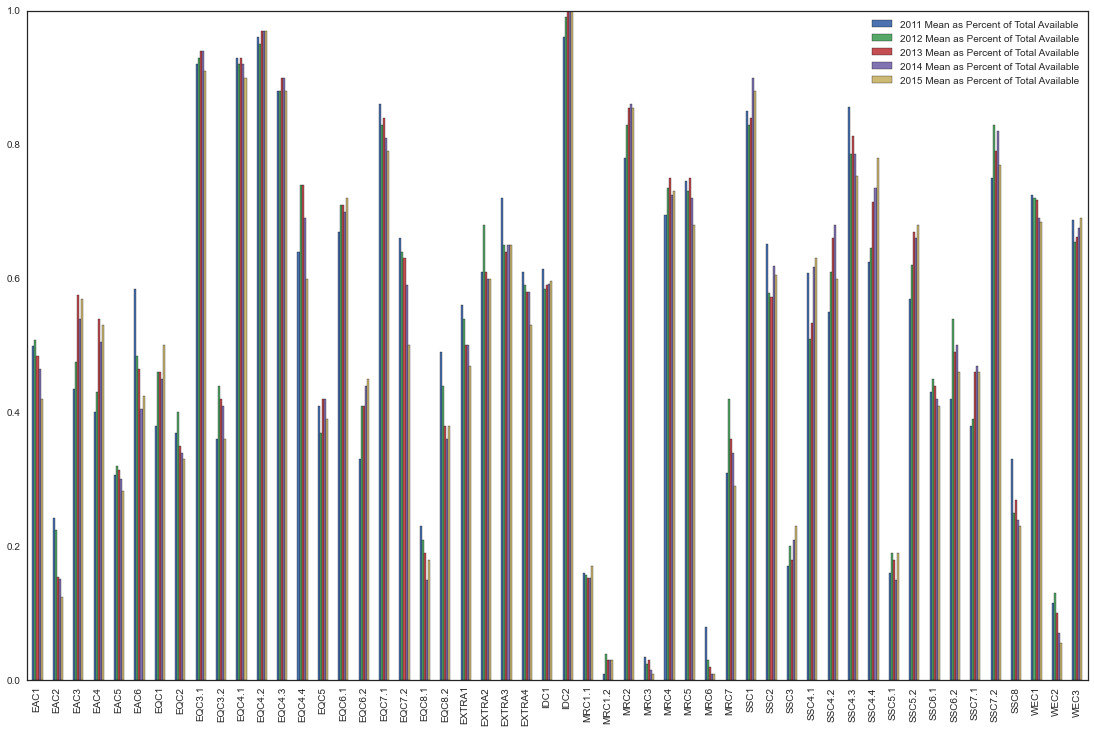

In [149]:
yearly_2009_mean.plot(kind="bar", figsize=(19, 12))

#Analysis
Description: Average points achieved for LEED version 2009 by year. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: Credits vary in achievement. Some are easier or harder to meet. Those hard to meet (average less than 0.2 points) include on-ste renewable energy (EAc2), Daylight views (EQ8.1), Building and material reuse/renewable (MRc1, 3, 8), and innovaitve waste water technologies.

Further analysis: analyze the difference between indsutry types (e.g. residential, commerical, retail) or owner type (non-profit, federal, for-profit). 

In [150]:
average_comparison_2009_small.head()

,Platinum,Gold,Silver,Certified,Score Possible,Platinum Mean as Percent of Total Available,Gold Mean as Percent of Total Available,Silver Mean as Percent of Total Available,Certified Mean as Percent of Total Available
EAC1,17.67,11.75,7.60,5.41,19,0.930000,0.618421,0.400000,0.284737
EAC2,5.33,1.81,0.57,0.21,7,0.761429,0.258571,0.081429,0.030000
EAC3,1.55,1.26,1.10,0.58,2,0.775000,0.630000,0.550000,0.290000
EAC4,1.22,1.09,1.03,0.76,2,0.610000,0.545000,0.515000,0.380000
EAC5,1.99,1.08,0.82,0.56,3,0.663333,0.360000,0.273333,0.186667


In [152]:
level_2009_mean = average_comparison_2009_small[['Platinum Mean as Percent of Total Available',
                                                        'Gold Mean as Percent of Total Available',
                                                        'Silver Mean as Percent of Total Available',
                                                        'Certified Mean as Percent of Total Available']]

In [155]:
level_2009_mean.head()

,Platinum Mean as Percent of Total Available,Gold Mean as Percent of Total Available,Silver Mean as Percent of Total Available,Certified Mean as Percent of Total Available
EAC1,0.930000,0.618421,0.400000,0.284737
EAC2,0.761429,0.258571,0.081429,0.030000
EAC3,0.775000,0.630000,0.550000,0.290000
EAC4,0.610000,0.545000,0.515000,0.380000
EAC5,0.663333,0.360000,0.273333,0.186667


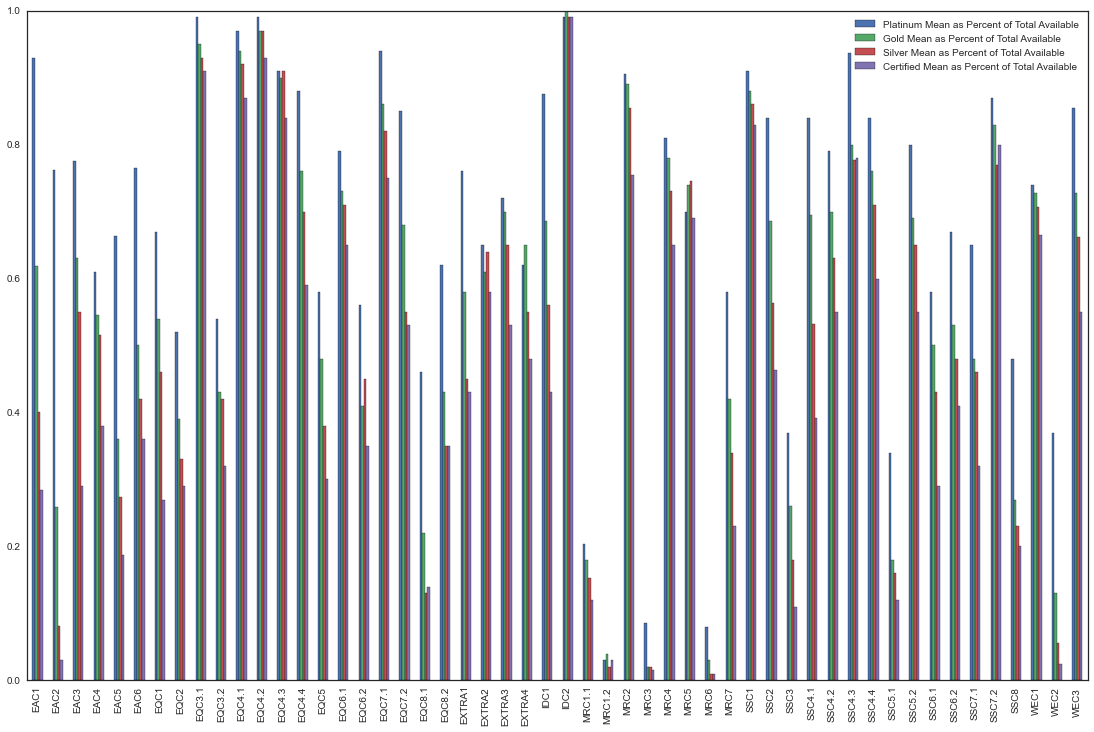

In [154]:
level_2009_mean.plot(kind="bar", figsize=(19, 12))

#Analysis
Description: Average points achieved for LEED version 2009 by level of achievement. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: Platinum buidlings outperform on energy and atmosphere credits. Very few projects reuse existing buidlings (MRc2.1), resue material (MRc3) or incorperate rapidly renewable materials (MRc6). 

Further analysis: analyze the difference over years by level of achievement.

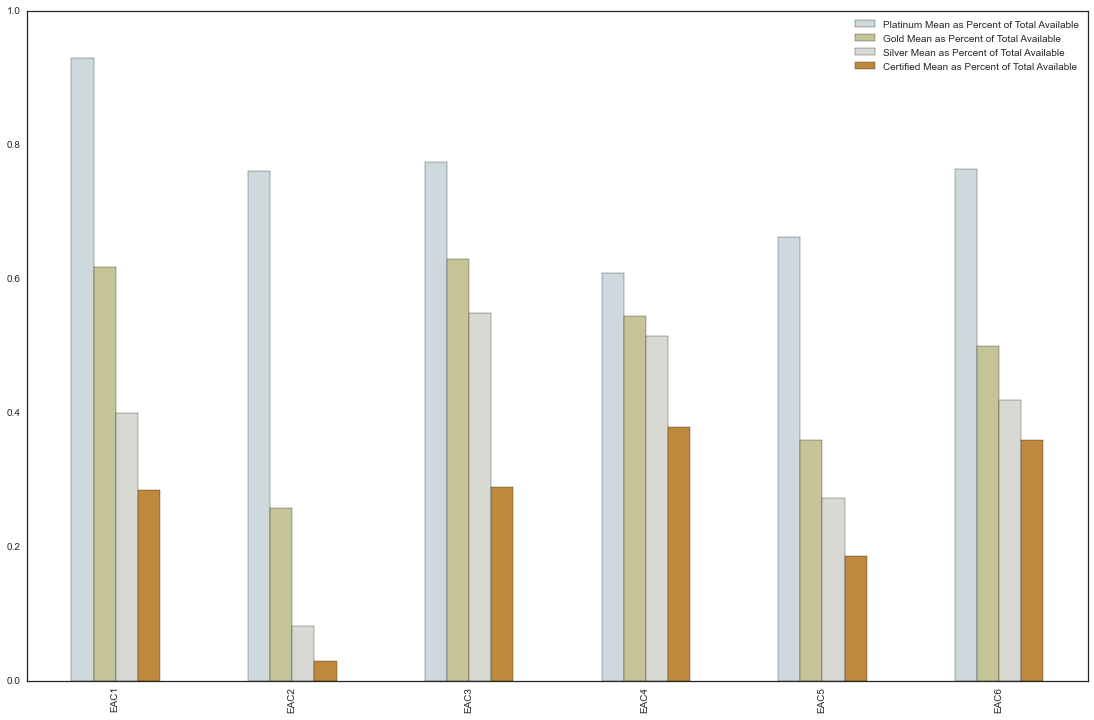

In [185]:
level_2009_mean.iloc[0:6].plot(kind="bar", figsize=(19, 12), color=['#CED9DE', '#C4C497', '#D9D9D4', '#BF893D'])

#Analysis
Description: Average points achieved for Energy and Atmosphere - LEED version 2009 by level of achievement. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: Optimizing energy and on-site reneable energy are hard to do. Projects aiming for Platinum are more likely to optimize energy performance (EAc1) and include on-site renewable energy (EAc2). While, the difference between achievement is less for enhanced refrigerant (EAc4), a credit that appears easier to meet. 

Further analysis: where are the platinum projects? What qualities of the project (e.g. building type, geographic location, population density  from other projects? 

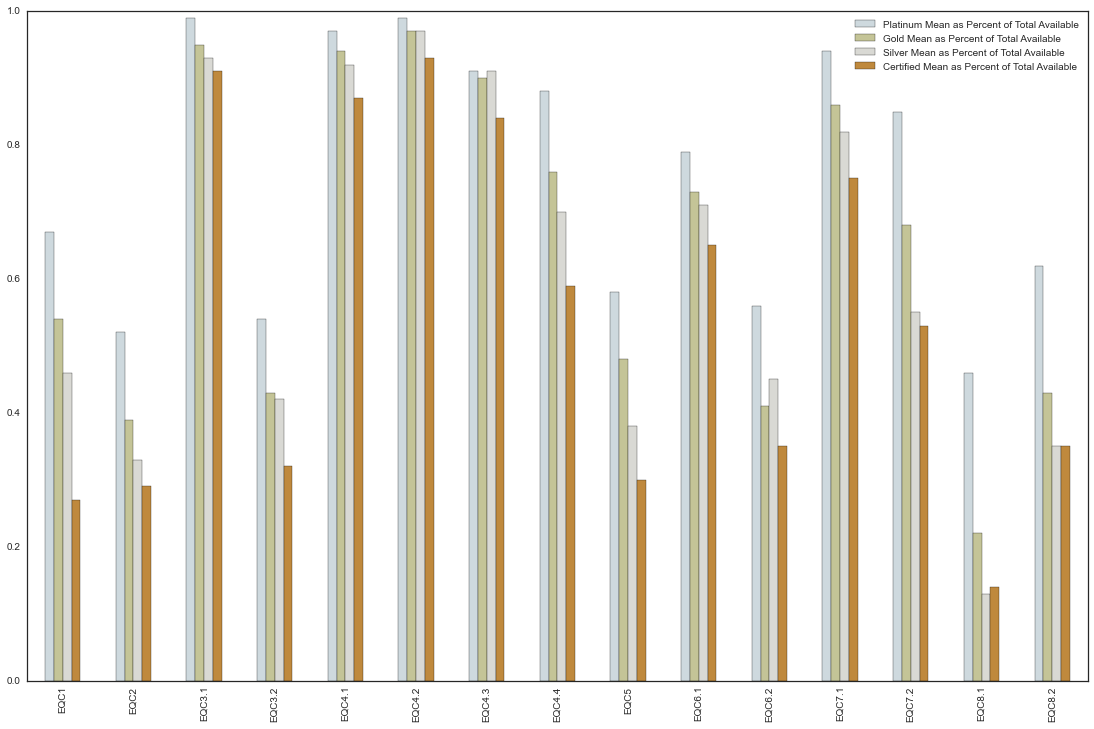

In [187]:
level_2009_mean.iloc[6:21].plot(kind="bar", figsize=(19, 12), color=['#CED9DE', '#C4C497', '#D9D9D4', '#BF893D'])

#Analysis
Description: Average points achieved for Indoor Environmental Quality - LEED version 2009 by level of achievement. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: Some of these credits appear easy to meet and may now be indsutry standards. For example, almost all projects meet indoor environmental quality plan for during construction (EQc3.1) and low emitting materials (EQc4.1, EQc4.2, EQc4.3). 

Further analysis: Have credits everyone performs achieves always been this way? Or over time have these increased? 

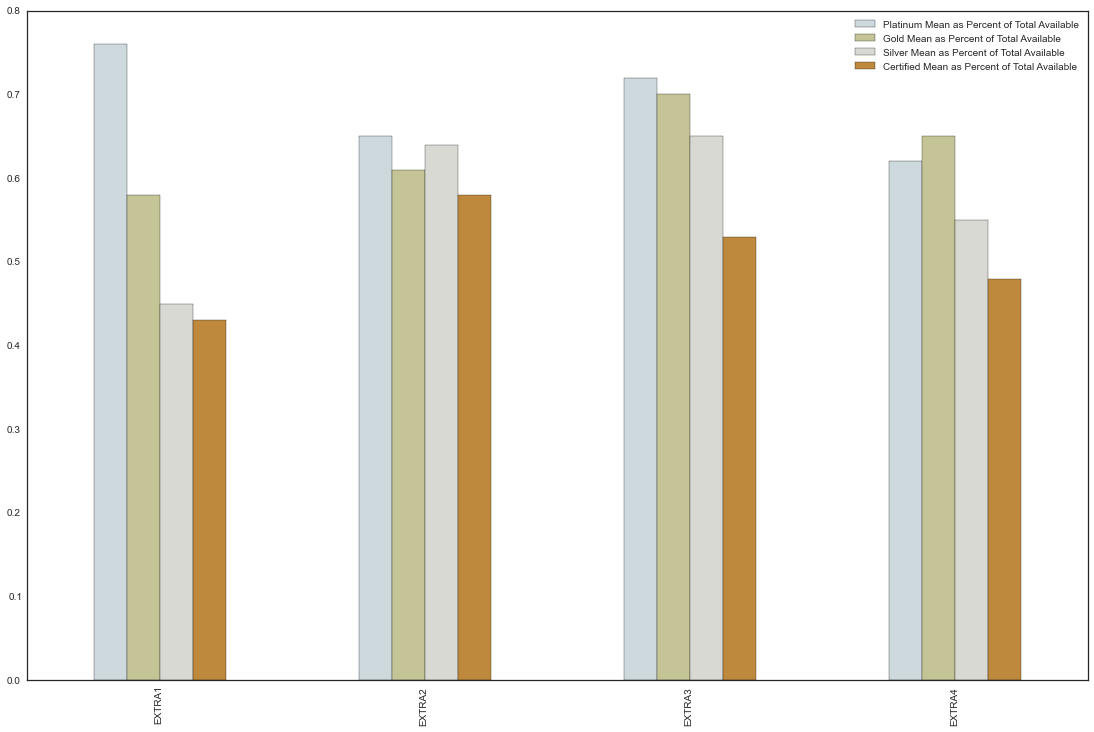

In [190]:
level_2009_mean.iloc[21:25].plot(kind="bar", figsize=(19, 12), color=['#CED9DE', '#C4C497', '#D9D9D4', '#BF893D'])

#Analysis
Description: Average points achieved for Regional Priority - LEED version 2009 by level of achievement. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: Platinum is less significant with regional priporty credits. 

Further analysis: Regional Priority changes by geographic region. What is the best performing region? 

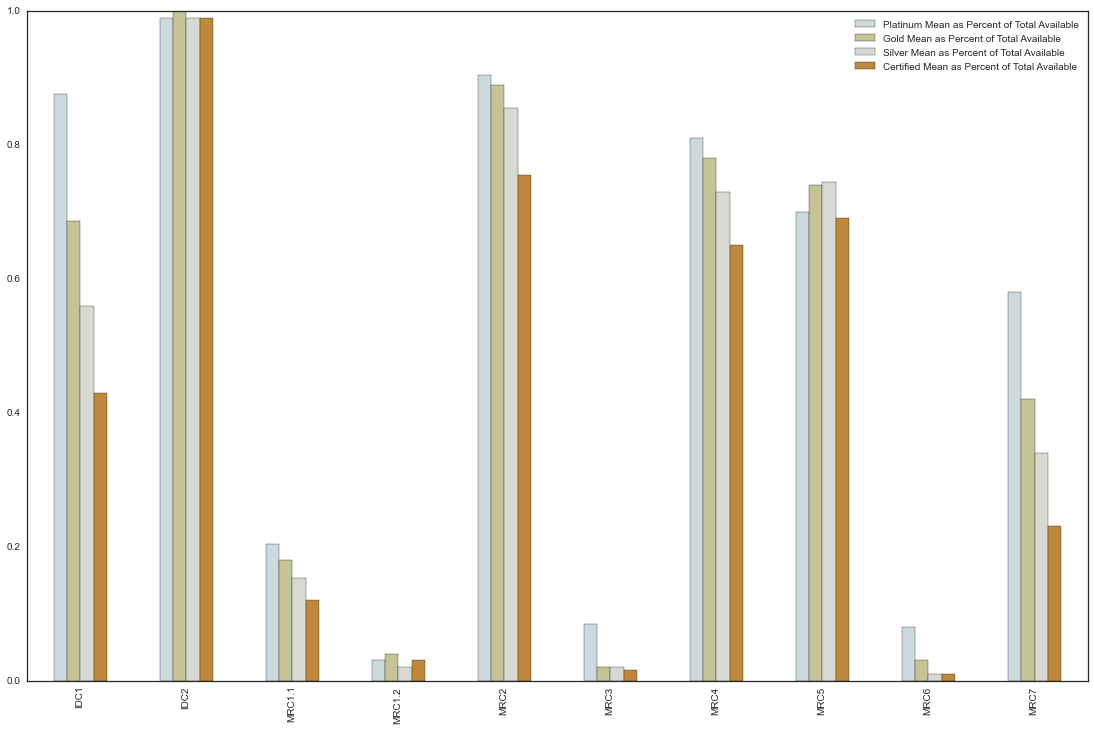

In [193]:
level_2009_mean.iloc[25:35].plot(kind="bar", figsize=(19, 12), color=['#CED9DE', '#C4C497', '#D9D9D4', '#BF893D'])

#Analysis
Description: Average points achieved for Material and Resources - LEED version 2009 by level of achievement. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: Material and Resources credits are the hardest to achieve.

Further analysis: Where are the geographic locations for projects meeting the hardest points to achieve?  

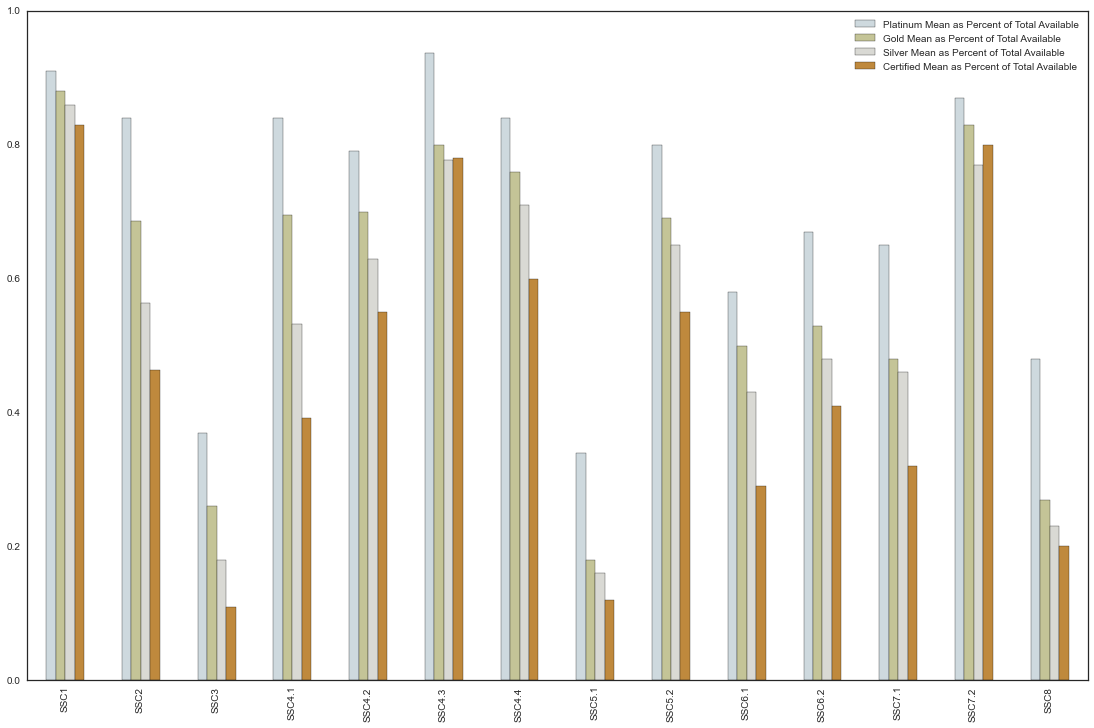

In [197]:
level_2009_mean.iloc[35:49].plot(kind="bar", figsize=(19, 12), color=['#CED9DE', '#C4C497', '#D9D9D4', '#BF893D'])

#Analysis
Description: Average points achieved for Regional Priority - LEED version 2009 by level of achievement. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: A sustainable site (SSc1) and reducing heat island effect on roofs (SS7.2) appear to easy achieve. The low scores for SSc3 and SSc5.1 are expected because not all projects are located on a brownfield site or include wildlife habitat to restore. 

Further analysis: Alternative transportation is easier to achieve in urban areas and stormwater design is more important in urban areas. How are the rural project performing on alternative transportation? How are the urban projects performing on stormwater design?

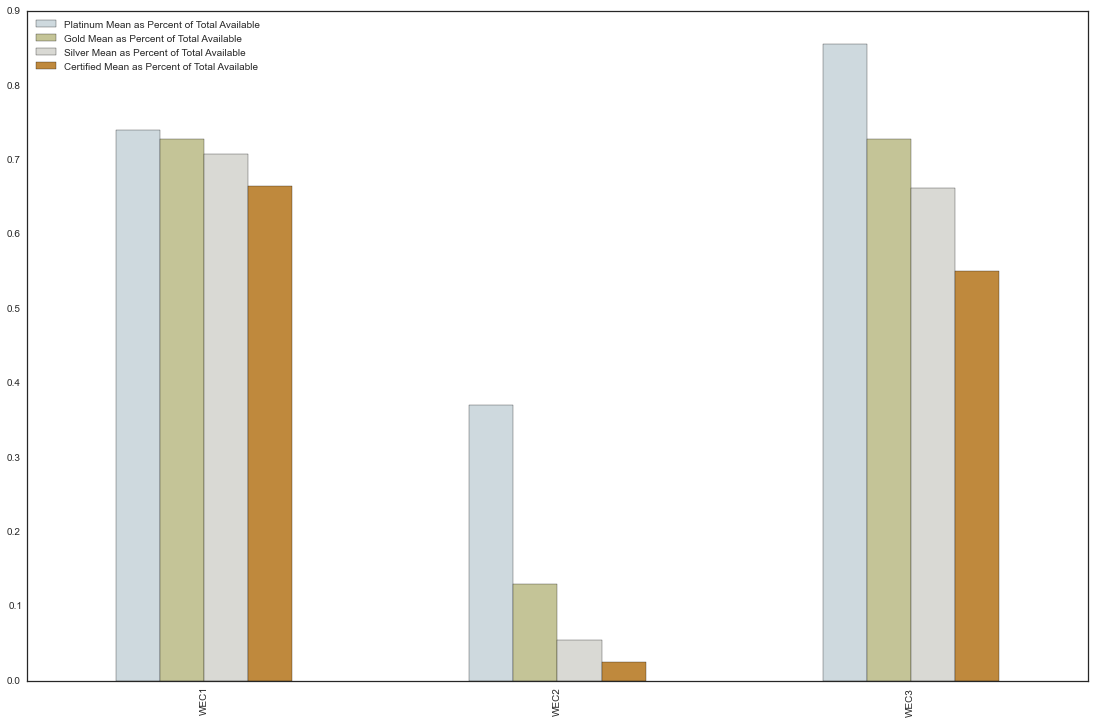

In [198]:
level_2009_mean.iloc[49:].plot(kind="bar", figsize=(19, 12), color=['#CED9DE', '#C4C497', '#D9D9D4', '#BF893D'])

#Analysis
Description: Average points achieved for Water Efficiency - LEED version 2009 by level of achievement. Credits valued more than 1 point were normalized to a 0 to 1 scale. 

Intersting Findings: Technologies like low flow sinks and toliets that help meet WEc3 are likely more readily available and easier to implement than innovative waster water technologies (WEc2). 

Further analysis: Are there some states or regions that implement waaste water technologies more than others? And are regulations or building codes a reason? 

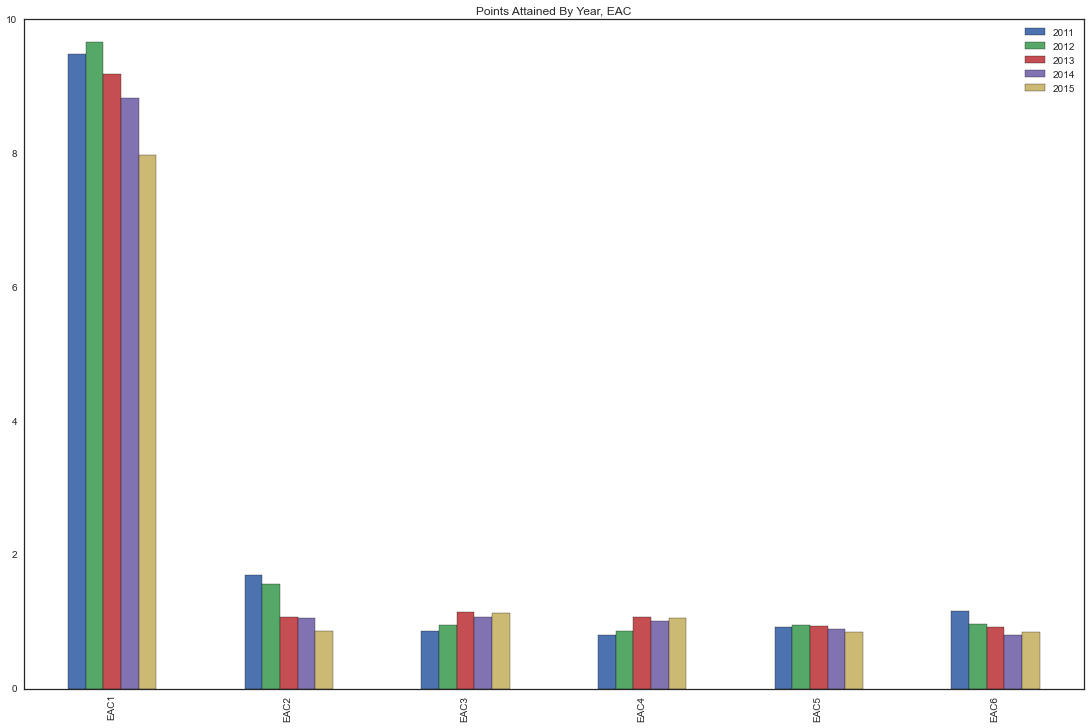

In [176]:
year_plot = yearly_average_comparison_2009_small.ix[0:6,0:5].plot(kind="bar", figsize=(19, 12), title="Points Attained By Year, EAC")

#Analysis
Description: Average points achieved for Energy and Atmosphere - LEED version 2009 by year. Credit EAc1 is out of a possible 10 points. 

Intersting Findings: We expected credit adoption to increase over years as technologies advanced and LEED became more widely known. Yet, energy performance is declining and the others stay relatively the same.   

Further analysis: Is this different by project type (e.g. residential, commercial, retail)? 

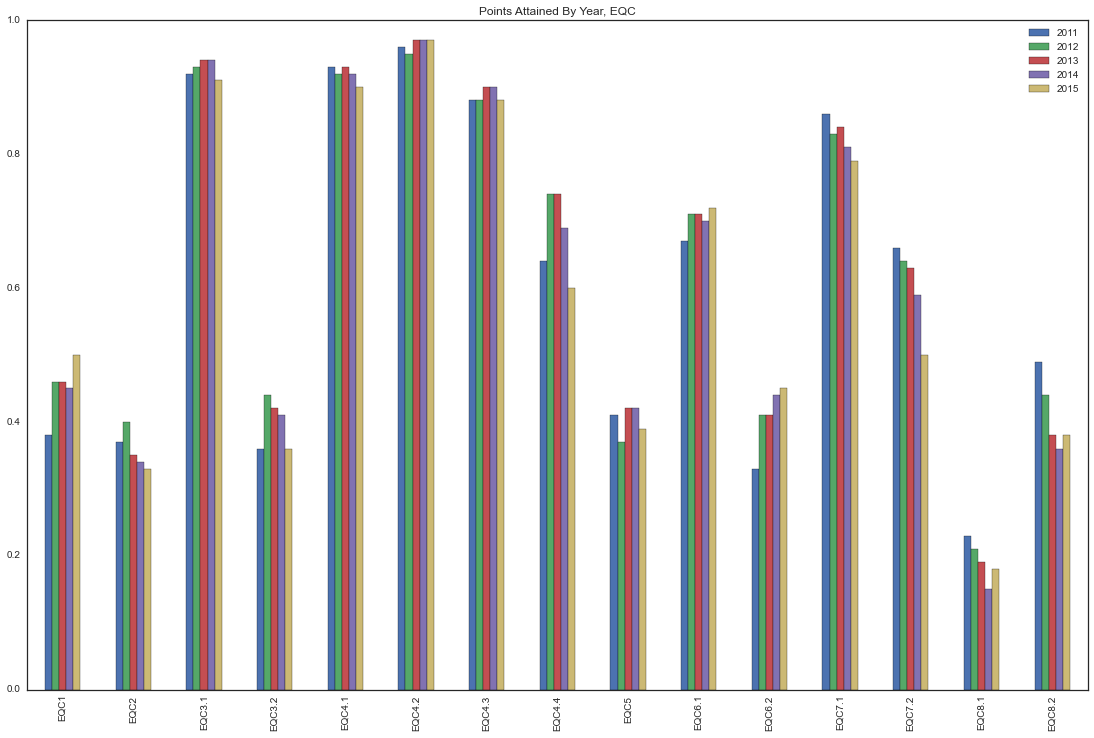

In [206]:
year_plot = yearly_average_comparison_2009_small.ix[6:21,0:5].plot(kind="bar", figsize=(19, 12), title="Points Attained By Year, EQC")

#Analysis
Description: Average points achieved for Indoor Environmental Quality - LEED version 2009 by year. All credits are out of 1 point.

Intersting Findings: Two credits, Outdoor Air Delivery Monitoring (EQc1) and Controlability - Thermal Comfort (EQc6.2), increase adoption over years. Unfortunatley, three credits, Increased Ventilation (EQc2), Thermal Comfort - Design, and Thermal Comfort - Verification, decrease in adoption over time. We expected adoption to increase over time but the majority have no trend. 

Further analysis: Where are the projects with increasing credit adoption and is there an explanation (e.g. policy, subsidy, etc.) to explain it? 

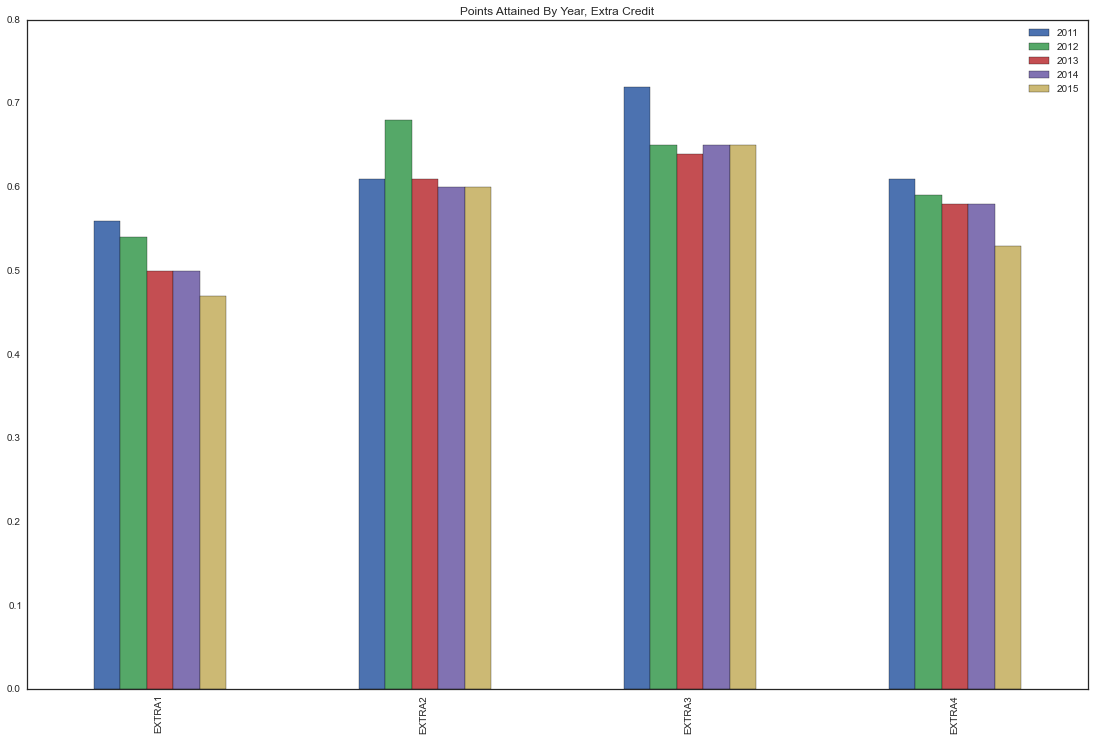

In [205]:
year_plot = yearly_average_comparison_2009_small.ix[21:25,0:5].plot(kind="bar", figsize=(19, 12), title="Points Attained By Year, Extra Credit")

#Analysis
Description: Average points achieved for Regional Priority - LEED version 2009 by year. All credits are out of 1 point.

Intersting Findings: Regional Priority shows a negative trend in adoption.  

Further analysis: Regional Priority credits change by geographic region. What credits are the greatest and least met? 

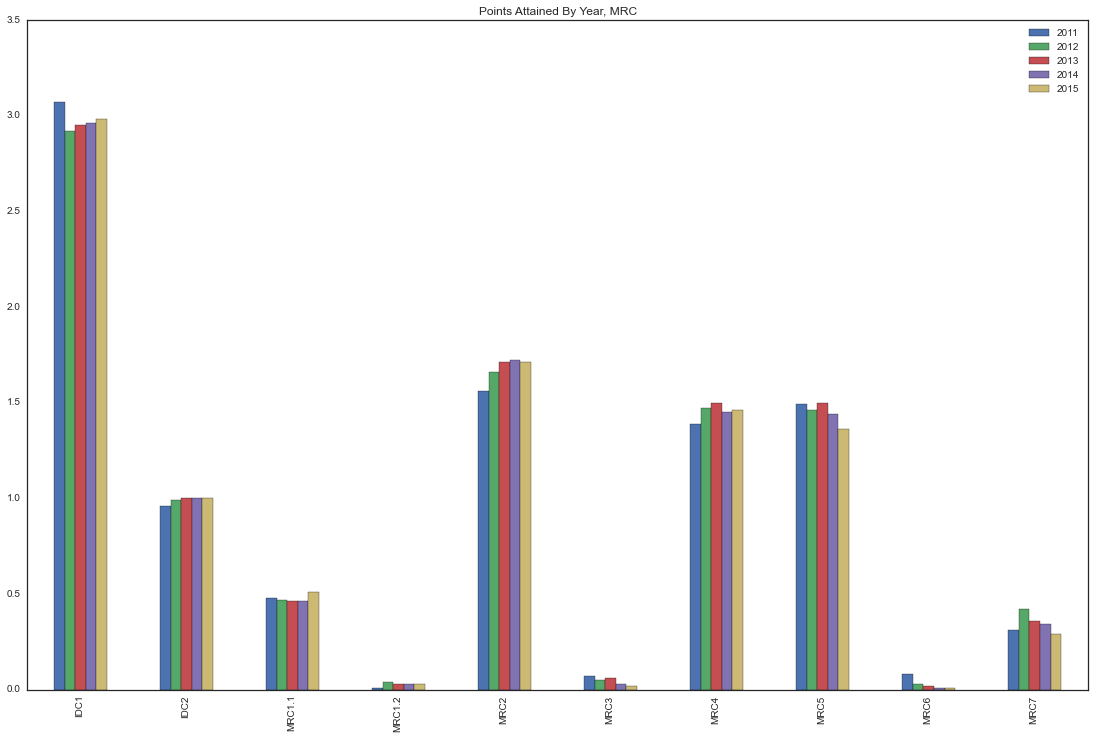

In [209]:
year_plot = yearly_average_comparison_2009_small.ix[25:35,0:5].plot(kind="bar", figsize=(19, 12), title="Points Attained By Year, MRC")

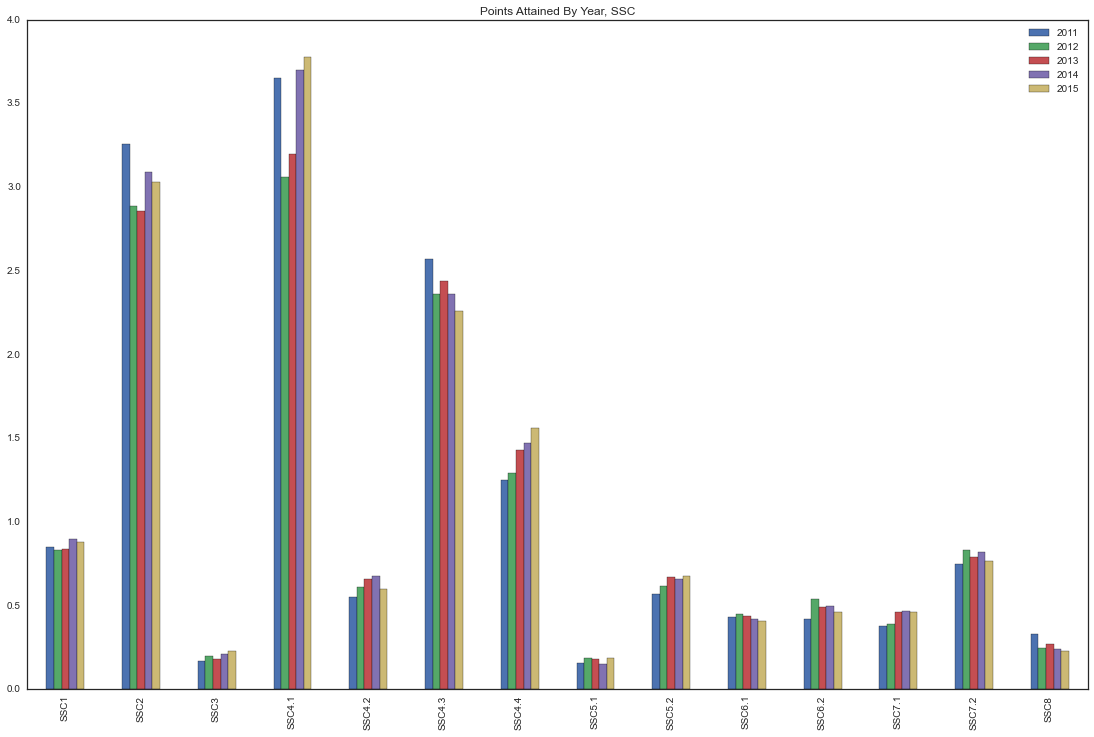

In [210]:
year_plot = yearly_average_comparison_2009_small.ix[35:49,0:5].plot(kind="bar", figsize=(19, 12), title="Points Attained By Year, SSC")

#Analysis
Description: Average points achieved for Sustainable Sites - LEED version 2009 by year. Credit SSc2 is out of 5 points, SSc4.1 is out of 6 points, SSc4.3 is out of 3 points, SSc4.4 is out of 2 points. 

Intersting Findings: Projects included fewer parking spots each year (SSc4.4) but this also includes designated spots for low emmitting vehicles SSc4.3. Light pollution reduction (SSc8) is consistently low. 

Further analysis: Is their a difference between project type (e.g. residential, commercial, retail)? 

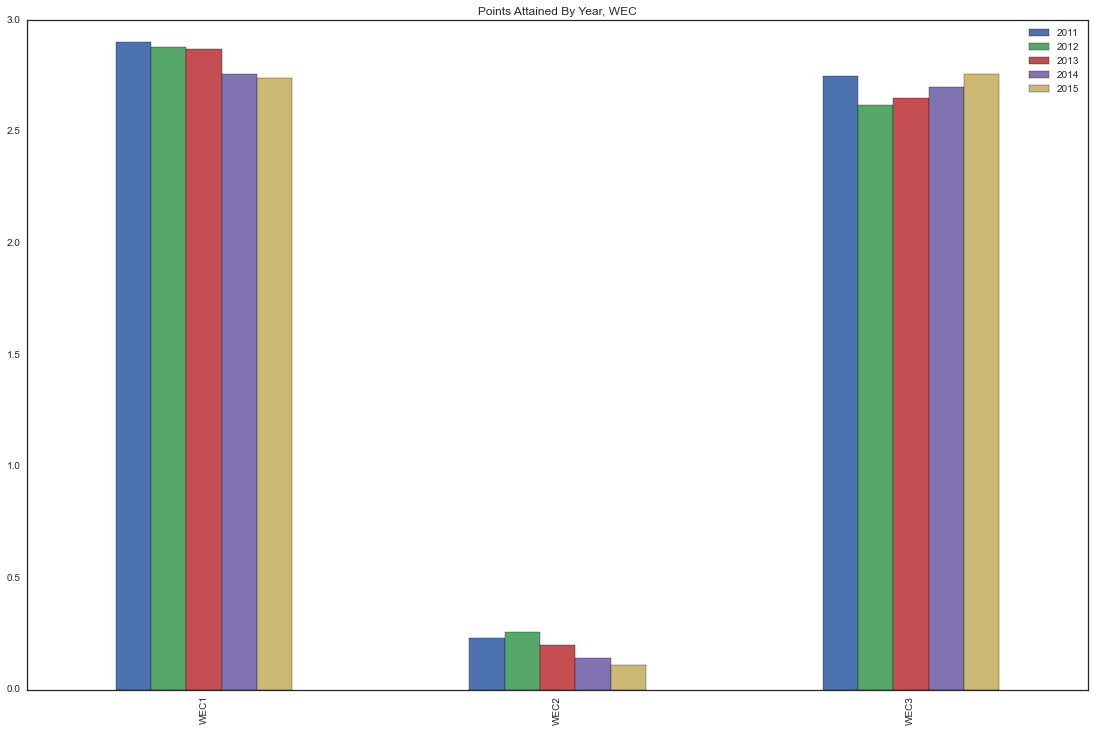

In [211]:
year_plot = yearly_average_comparison_2009_small.ix[49:,0:5].plot(kind="bar", figsize=(19, 12), title="Points Attained By Year, WEC")

#Analysis
Description: Average points achieved for Water Efficiency - LEED version 2009 by year. Credits WEc1 and WEc3 are out 2 to 4 points and WEc2 is 2 points. 

Intersting Findings: We need more waste water innovations. Both efficicent landscaping and water reduction seem to be mainstream as the average score is quite high. 

Further analysis: Where are the bright spots? Who is meeting WEc2? Whats keeping it behind? 